### Target:
    
    - Making the model as light as possible.

### Results:

    - Model has 10.3k parameters.

    - Train Accuracy = 99.41

    - Test Accuracy = 99.24

### Analysis:

    - Squeeze expand skeleton gradually increasing channels to 32.

    - Overfitting reduced significantly.

In [1]:
import torch
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

In [2]:
# Device
if torch.cuda.is_available():
    device = "cuda"
elif torch.backends.mps.is_available():
    device = "mps"
else:
    device = "cpu"
print("Device Selected:", device)

Device Selected: mps


In [3]:
SEED = 42
torch.manual_seed(SEED)

if device == 'cuda':
    torch.cuda.manual_seed(SEED)

In [4]:
# Train data transformations
train_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
])

# Test data transformations
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

In [5]:
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=test_transforms)

In [6]:
batch_size = 32

kwargs = {'batch_size': batch_size, 'num_workers': 4, 'pin_memory': True}

train_loader = torch.utils.data.DataLoader(train_data, shuffle=True, **kwargs)
test_loader = torch.utils.data.DataLoader(test_data, shuffle=False, **kwargs)

In [7]:
from model import Model3 as Net

model = Net()
model.summary(input_size=(batch_size, 1, 28, 28))

Layer (type:depth-idx)                   Input Shape               Output Shape              Param #                   Param %
Model3                                   [32, 1, 28, 28]           [32, 10]                  --                             --
├─Sequential: 1-1                        [32, 1, 28, 28]           [32, 8, 28, 28]           --                             --
│    └─Conv2d: 2-1                       [32, 1, 28, 28]           [32, 8, 28, 28]           72                          0.70%
│    └─ReLU: 2-2                         [32, 8, 28, 28]           [32, 8, 28, 28]           --                             --
│    └─Conv2d: 2-3                       [32, 8, 28, 28]           [32, 8, 28, 28]           576                         5.58%
│    └─ReLU: 2-4                         [32, 8, 28, 28]           [32, 8, 28, 28]           --                             --
├─Sequential: 1-2                        [32, 8, 28, 28]           [32, 8, 14, 14]           --                

In [8]:
from utils import train, test

In [9]:
model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

criterion = F.nll_loss
num_epochs = 15

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train(model, device, train_loader, optimizer, criterion)
  test(model, device, test_loader, criterion)

Epoch 1


  0%|          | 0/1875 [00:00<?, ?it/s]

Test set: Average loss: 0.0917, Accuracy: 9710/10000 (97.10%)

Epoch 2


  0%|          | 0/1875 [00:00<?, ?it/s]

Test set: Average loss: 0.0504, Accuracy: 9843/10000 (98.43%)

Epoch 3


  0%|          | 0/1875 [00:00<?, ?it/s]

Test set: Average loss: 0.0578, Accuracy: 9805/10000 (98.05%)

Epoch 4


  0%|          | 0/1875 [00:00<?, ?it/s]

Test set: Average loss: 0.0288, Accuracy: 9899/10000 (98.99%)

Epoch 5


  0%|          | 0/1875 [00:00<?, ?it/s]

Test set: Average loss: 0.0354, Accuracy: 9890/10000 (98.90%)

Epoch 6


  0%|          | 0/1875 [00:00<?, ?it/s]

Test set: Average loss: 0.0364, Accuracy: 9882/10000 (98.82%)

Epoch 7


  0%|          | 0/1875 [00:00<?, ?it/s]

Test set: Average loss: 0.0403, Accuracy: 9875/10000 (98.75%)

Epoch 8


  0%|          | 0/1875 [00:00<?, ?it/s]

Test set: Average loss: 0.0338, Accuracy: 9893/10000 (98.93%)

Epoch 9


  0%|          | 0/1875 [00:00<?, ?it/s]

Test set: Average loss: 0.0328, Accuracy: 9899/10000 (98.99%)

Epoch 10


  0%|          | 0/1875 [00:00<?, ?it/s]

Test set: Average loss: 0.0329, Accuracy: 9893/10000 (98.93%)

Epoch 11


  0%|          | 0/1875 [00:00<?, ?it/s]

Test set: Average loss: 0.0351, Accuracy: 9899/10000 (98.99%)

Epoch 12


  0%|          | 0/1875 [00:00<?, ?it/s]

Test set: Average loss: 0.0249, Accuracy: 9924/10000 (99.24%)

Epoch 13


  0%|          | 0/1875 [00:00<?, ?it/s]

Test set: Average loss: 0.0252, Accuracy: 9914/10000 (99.14%)

Epoch 14


  0%|          | 0/1875 [00:00<?, ?it/s]

Test set: Average loss: 0.0326, Accuracy: 9888/10000 (98.88%)

Epoch 15


  0%|          | 0/1875 [00:00<?, ?it/s]

Test set: Average loss: 0.0287, Accuracy: 9912/10000 (99.12%)



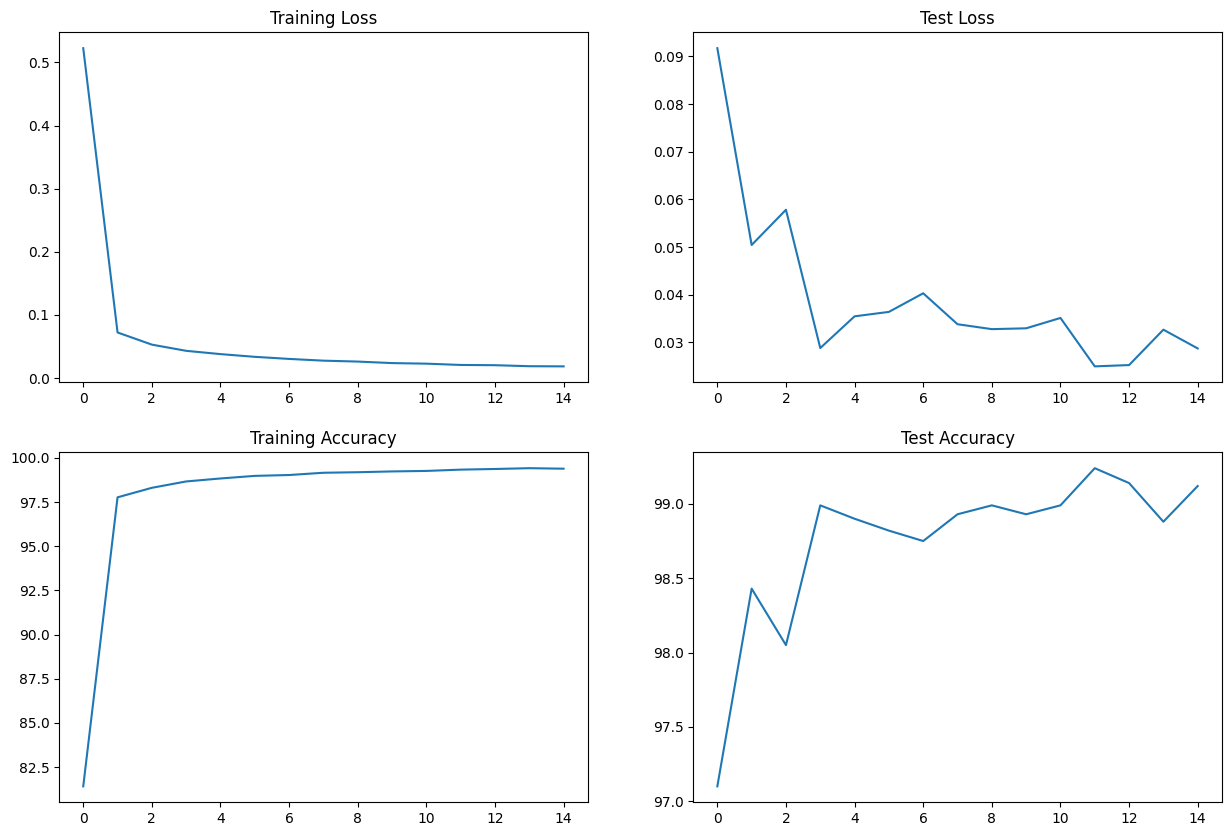

In [10]:
from utils import plot_stats
plot_stats()

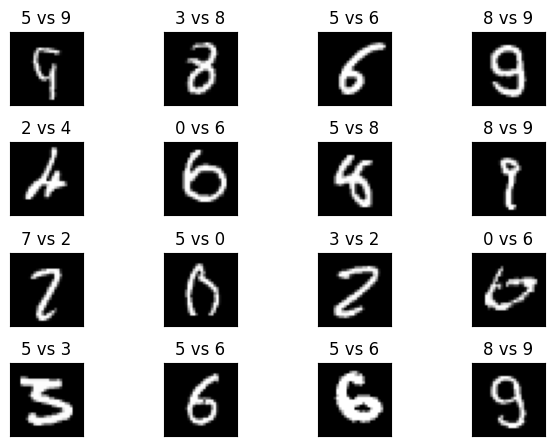

In [11]:
from utils import show_incorrect
show_incorrect() # Predicted vs Actual